In [172]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/magister_Python/index2022_changed.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country Name                 170 non-null    object 
 1   Tariff Rate (%)              170 non-null    float64
 2   Income Tax Rate (%)          170 non-null    float64
 3   Corporate Tax Rate (%)       170 non-null    float64
 4   Tax Burden % of GDP          170 non-null    float64
 5   Gov't Expenditure % of GDP   170 non-null    float64
 6   Population (Millions)        170 non-null    float64
 7   GDP (Billions, PPP)          170 non-null    float64
 8   GDP Growth Rate (%)          170 non-null    float64
 9   5 Year GDP Growth Rate (%)   170 non-null    float64
 10  GDP per Capita (PPP)         170 non-null    float64
 11  Unemployment (%)             170 non-null    float64
 12  Inflation (%)                170 non-null    float64
 13  FDI Inflow (Millions

Зробимо стовпчик  FDI Inflow (Millions) звичайним float стовпчиком:

In [174]:
import pandas as pd

# Remove spaces and convert to float
data['FDI Inflow (Millions)'] = data['FDI Inflow (Millions)'].str.replace(' ', '').astype(float)


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country Name                 170 non-null    object 
 1   Tariff Rate (%)              170 non-null    float64
 2   Income Tax Rate (%)          170 non-null    float64
 3   Corporate Tax Rate (%)       170 non-null    float64
 4   Tax Burden % of GDP          170 non-null    float64
 5   Gov't Expenditure % of GDP   170 non-null    float64
 6   Population (Millions)        170 non-null    float64
 7   GDP (Billions, PPP)          170 non-null    float64
 8   GDP Growth Rate (%)          170 non-null    float64
 9   5 Year GDP Growth Rate (%)   170 non-null    float64
 10  GDP per Capita (PPP)         170 non-null    float64
 11  Unemployment (%)             170 non-null    float64
 12  Inflation (%)                170 non-null    float64
 13  FDI Inflow (Millions

In [176]:
X = data.drop(['Country Name'], axis=1)
y = data['Country Name']

Стандартизуємо дані

In [177]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate the 'Country Name' column
country_names = data['Country Name']

# Standardize the numeric features (excluding 'Country Name')
numeric_features = data.drop('Country Name', axis=1)



Сформуємо головні компоненти

In [178]:
scaler = StandardScaler()
numeric_features_standardized = scaler.fit_transform(numeric_features)

# Perform PCA on the standardized numeric features
pca = PCA(n_components=5)
numeric_features_pca = pca.fit_transform(numeric_features_standardized)




In [179]:
# Calculate the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Create a DataFrame with the reduced features
data_reduced = pd.DataFrame(numeric_features_pca, columns=[f'PC{i}' for i in range(1, 6)])

# Add back the 'Country Name' column
data_reduced['Country Name'] = country_names



In [180]:
# Print the explained variance ratios and cumulative explained variance
print("Explained Variance Ratios for the Principal Components:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratios for the Principal Components:
[0.19874096 0.18792627 0.16225165 0.12242448 0.07311431]

Cumulative Explained Variance:
[0.19874096 0.38666723 0.54891888 0.67134336 0.74445767]


5 факторів пояснюють 75% початкової інформації

Візуалізація внеску стовпців у формування головних компонент

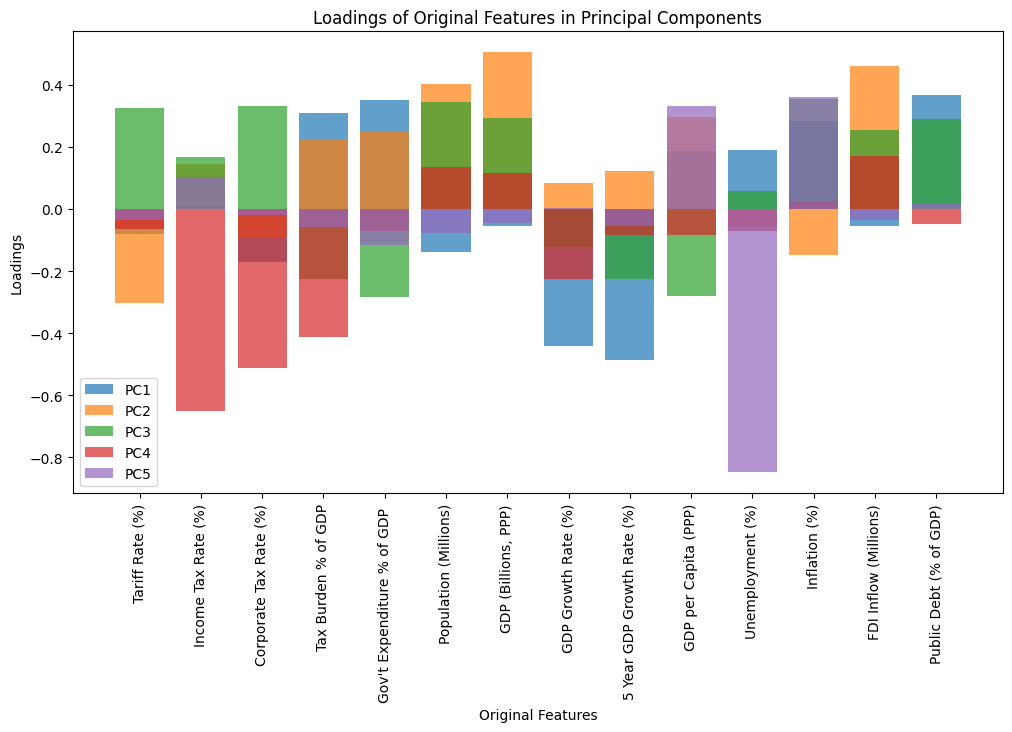

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract the features to analyze (excluding 'Country Name')
features = data.drop(['Country Name'], axis=1)

# Standardize the features
standardized_features = (features - features.mean()) / features.std()

# Perform PCA with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(standardized_features)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to visualize the loadings
loadings_df = pd.DataFrame(pca.components_, columns=features.columns)

# Plot the loadings
plt.figure(figsize=(12, 6))
plt.bar(range(len(features.columns)), loadings_df.iloc[0, :], alpha=0.7, label='PC1')
plt.bar(range(len(features.columns)), loadings_df.iloc[1, :], alpha=0.7, label='PC2')
plt.bar(range(len(features.columns)), loadings_df.iloc[2, :], alpha=0.7, label='PC3')
plt.bar(range(len(features.columns)), loadings_df.iloc[3, :], alpha=0.7, label='PC4')
plt.bar(range(len(features.columns)), loadings_df.iloc[4, :], alpha=0.7, label='PC5')
plt.xticks(range(len(features.columns)), features.columns, rotation=90)
plt.xlabel('Original Features')
plt.ylabel('Loadings')
plt.legend()
plt.title('Loadings of Original Features in Principal Components')
plt.show()

Виведення країн учасників кластеру та візуалізація кластерів за допомогою діаграми

0    90
1    77
2     3
Name: Cluster, dtype: int64

Cluster 1: 
0                   Albania
1                   Algeria
3                 Argentina
4                   Armenia
5                 Australia
               ...         
160    United Arab Emirates
161          United Kingdom
163                 Uruguay
165                 Vanuatu
166               Venezuela
Name: Country Name, Length: 90, dtype: object

Cluster 2: 
2          Angola
7      Azerbaijan
10     Bangladesh
15          Benin
16         Bhutan
          ...    
158        Uganda
164    Uzbekistan
167       Vietnam
168        Zambia
169      Zimbabwe
Name: Country Name, Length: 77, dtype: object

Cluster 3: 
33             China
71             India
162    United States
Name: Country Name, dtype: object


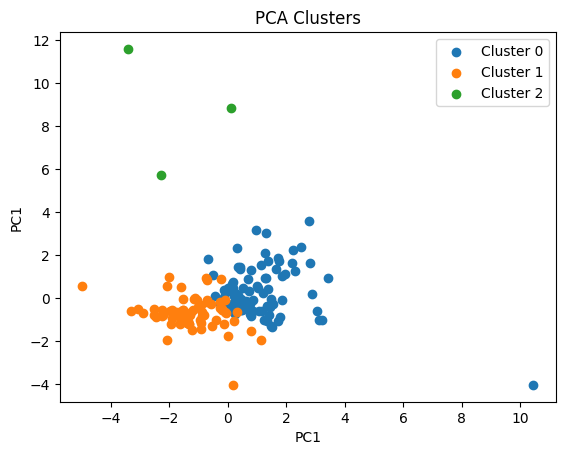

In [182]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the PCA components for clustering
X = data_reduced[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

# Specify the number of clusters
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)

# Add the cluster labels back to data
data_reduced['Cluster'] = kmeans.labels_

# Print the count of countries in each cluster
print(data_reduced['Cluster'].value_counts())

# A short description of the clusters
cluster_descriptions = {
    0: 'Cluster 1: ',
    1: 'Cluster 2: ',
    2: 'Cluster 3: ',
}

for cluster, description in cluster_descriptions.items():
    print(f'\n{description}')
    print(data_reduced[data_reduced['Cluster'] == cluster]['Country Name'])

# Visualize the clusters using scatter plots
for cluster in range(num_clusters):
    cluster_data = data_reduced[data_reduced['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.xlabel('PC1')
plt.ylabel('PC1')
plt.title('PCA Clusters')
plt.legend()
plt.show()


Список країн за кластерами

In [183]:
import pandas as pd
from sklearn.cluster import KMeans

# Extract the PCA components for clustering
X = data_reduced[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

# Specify the number of clusters
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)

# Add the cluster labels back to data
data_reduced['Cluster'] = kmeans.labels_

# Create an empty dictionary to store cluster data
cluster_data = {}

# Iterate through clusters and populate the dictionary
for cluster in range(num_clusters):
    cluster_countries = data_reduced[data_reduced['Cluster'] == cluster]['Country Name'].tolist()
    cluster_data[f'Cluster {cluster + 1}'] = cluster_countries

# Create a DataFrame from the dictionary
clustered_countries_df = pd.DataFrame.from_dict(cluster_data, orient='index').transpose()

# Print the resulting DataFrame
clustered_countries_df




,Cluster 1,Cluster 2,Cluster 3
0,Albania,Angola,China
1,Algeria,Azerbaijan,India
2,Argentina,Bangladesh,United States
3,Armenia,Benin,None
4,Australia,Bhutan,None
...,...,...,...
85,United Arab Emirates,None,None
86,United Kingdom,None,None
87,Uruguay,None,None
88,Vanuatu,None,None


In [184]:
clustered_countries_lists = []
for cluster in range(num_clusters):
    cluster_countries = data_reduced[data_reduced['Cluster'] == cluster]['Country Name'].tolist()
    clustered_countries_lists.append(cluster_countries)

# Print the lists of countries within each cluster
for i, cluster_countries in enumerate(clustered_countries_lists, 1):
    print(f'Cluster {i} Countries:')
    print(cluster_countries)
    print()

Cluster 1 Countries:
['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Canada', 'Cabo Verde', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Eritrea', 'Estonia', 'Eswatini', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kuwait', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lesotho', 'Lithuania', 'Luxembourg', 'North Macedonia', 'Maldives', 'Malta', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Namibia', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Suriname', 'Sweden', 'Switzerland'